# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [2]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [3]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

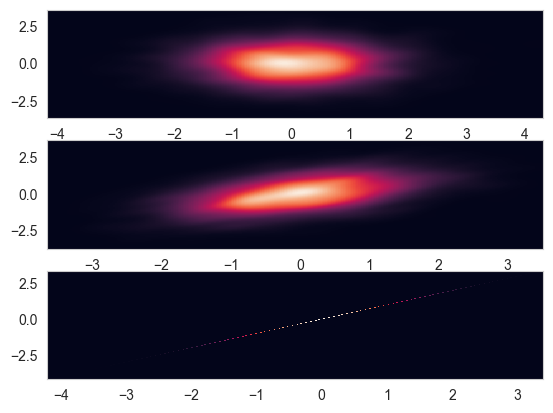

In [4]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [5]:
rho = 0.5
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)
x, y = data_2d[:,0], data_2d[:,1]
r = pearsonr(x, y)
_, x_bins = np.histogram(x)
_, y_bins = np.histogram(y)
mi = mutual_info_score(np.digitize(x, x_bins), np.digitize(y, y_bins))
r, mi

(PearsonRResult(statistic=0.4930776489915586, pvalue=1.0962196819831196e-304),
 0.13673119515814855)

#### bp 3)

In [6]:
rhos = [i * 0.1 for i in range(11)]
N = 100
n = 1000
results = []
idx = 0
for rho in rhos:
    for i in range(N):
        data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)
        x, y = data_2d[:,0], data_2d[:,1]
        r = pearsonr(x, y)
        _, x_bins = np.histogram(x)
        _, y_bins = np.histogram(y)
        mi = mutual_info_score(np.digitize(x, x_bins), np.digitize(y, y_bins))
        results += [{
            'rho': rho,
            'idx': idx,
            'stat': 'pearson_r',
            'value': r[0],
            },
            {
                'rho': rho,
                'idx': idx,
                'stat': 'mutual_info',
                'value':mi}]
        idx += 1
results = pd.DataFrame(results)

<Axes: xlabel='rho', ylabel='value'>

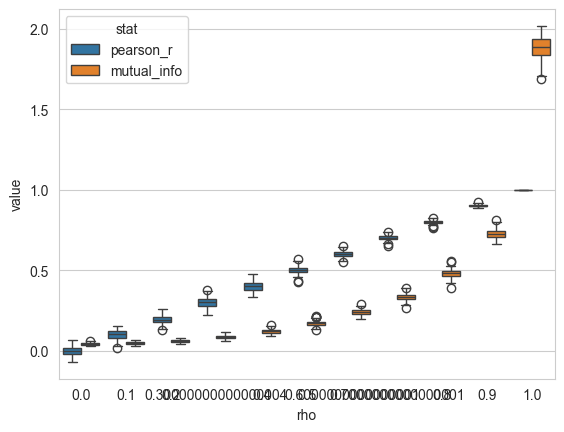

In [7]:
sns.boxplot(results, x='rho', y='value', hue='stat')

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [8]:
estimates = results.pivot(columns=['stat'], values=['value', 'rho'], index='idx')
estimates.columns = estimates.columns.droplevel()
estimates = estimates.iloc[:, 0:3]
estimates.columns = list(estimates.columns[0:2]) + ['rho']
estimates['rho_func'] = -0.5*np.log(1 - estimates['rho']**2)
estimates['rho_hat_func'] = -0.5*np.log(1 - estimates['pearson_r']**2)

E:\Studies\DataScience-3sem\MathematicalUnderpinningsOfMachineLearning\venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Studies\DataScience-3sem\MathematicalUnderpinningsOfMachineLearning\venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='rho_func', ylabel='mutual_info'>

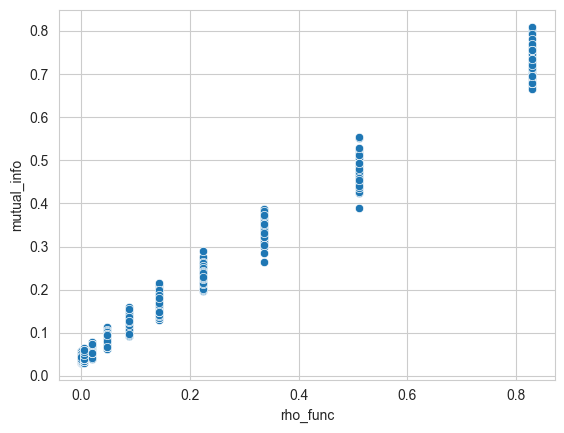

In [9]:
sns.scatterplot(estimates, x='rho_func', y='mutual_info')

<Axes: xlabel='rho_hat_func', ylabel='mutual_info'>

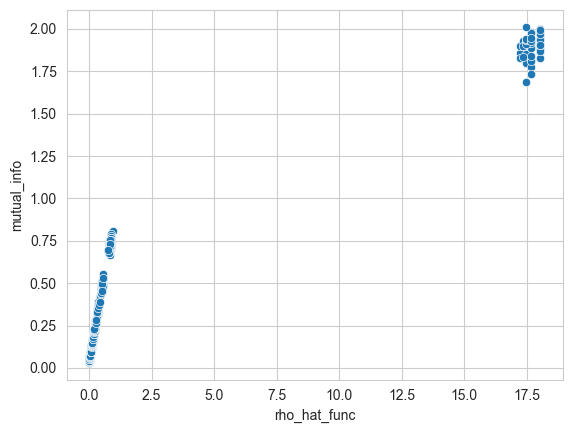

In [10]:
sns.scatterplot(estimates, x='rho_hat_func', y='mutual_info')

### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

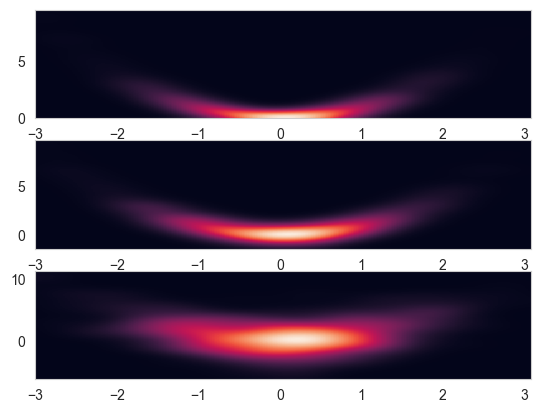

In [12]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [13]:
rho = 0.5
x, y = data_2d[:,0], data_2d[:,1]
r = pearsonr(x, y)
_, x_bins = np.histogram(x)
_, y_bins = np.histogram(y)
mi = mutual_info_score(np.digitize(x, x_bins), np.digitize(y, y_bins))
r, mi

(PearsonRResult(statistic=-0.04592351401585443, pvalue=0.1467302035470654),
 0.20449414704692898)

<Axes: xlabel='sigma', ylabel='value'>

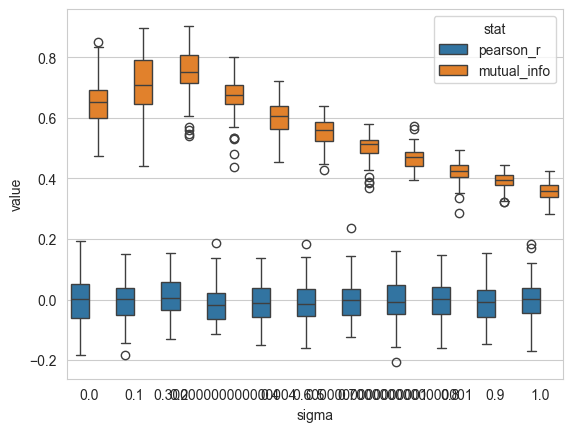

In [14]:
sigmas = [i * 0.1 for i in range(11)]
N = 100
n = 1000
results = []
idx = 0
for sigma in sigmas:
    for i in range(N):
        x = np.random.normal(0, 1, n)
        data_2d = np.array([x, x**2 + np.random.normal(0, sigma, n)]).T
        x, y = data_2d[:, 0], data_2d[:, 1]
        r = pearsonr(x, y)
        _, x_bins = np.histogram(x)
        _, y_bins = np.histogram(y)
        mi = mutual_info_score(np.digitize(x, x_bins), np.digitize(y, y_bins))
        results += [{
            'sigma': sigma,
            'idx': idx,
            'stat': 'pearson_r',
            'value': r[0],
        },
            {
                'sigma': sigma,
                'idx': idx,
                'stat': 'mutual_info',
                'value': mi}]
        idx += 1
results = pd.DataFrame(results)
sns.boxplot(results, x='sigma', y='value', hue='stat')

## Task 2

### a)

In [15]:
def asymptotic_independence_test(x, y, stat):
    if stat == 'mi':
        stat_value = 2 * len(x) * mutual_info_score(x, y)
    if stat == 'chi2':
        stat_value = chi2_contingency(pd.crosstab(x, y)).statistic

    df = (len(np.unique(x)) - 1)*(len(np.unique(y)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

### b)

In [16]:
def permutation_test(x, y, b):
    mi_b = [mutual_info_score(np.random.permutation(x), y) for _ in range(b)]
    mi = mutual_info_score(x, y)
    p_val = (1 + sum([1 if mi <= mi_b[i] else 0 for i in range(b)])) / (1 + b)
    return mi, p_val

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [17]:
# independent r.v. - we expect that our tests don't reject the null hypothesis
x, y = np.random.normal(size=100), np.random.normal(10, 2, size=100)
_, x_bins = np.histogram(x)
_, y_bins = np.histogram(y)
x, y = np.digitize(x, x_bins), np.digitize(y, y_bins)

asymptotic_independence_test(x, y, stat='chi2')

(103.3310066476733, 0.3897365092610384)

In [18]:
asymptotic_independence_test(x, y, stat='mi')

(86.60551579131152, 0.8277615967434695)

In [19]:
permutation_test(x, y, b=100)

(0.4330275789565576, 0.31683168316831684)

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [20]:
# independent r.v. - ideally we will reject the null hypothesis
x = np.random.normal(scale=5, size=100)
y = x + np.random.normal(scale=5, size=100)
_, x_bins = np.histogram(x)
_, y_bins = np.histogram(y)
x, y = np.digitize(x, x_bins), np.digitize(y, y_bins)

asymptotic_independence_test(x, y, stat='chi2')

(183.25530351250902, 2.4411263344070733e-08)

In [21]:
asymptotic_independence_test(x, y, stat='mi')

(137.9052033703511, 0.0008753801528231797)

In [22]:
permutation_test(x, y, b=100)

(0.6895260168517555, 0.009900990099009901)